Do a sliding window embedding of cos(t) + a*cos(2t), then cos(t) + a*cos(3t), mess with amplitudes, etc.

Try sonifying with different numbers of dimensions (use PCA to go down to the number of dimensions you want to sonify)

Do a sliding window embedding of a non-periodic signal 1. quasiperiodic signal in
	
doSinesExample(), 2. Amplitude moduled signal, 3. 
		
Try out sunspot data (and read about sunspot data and explain it to me). 
Find good sunspot data at least down to the month, down to the day would be even better

What I would like to see (hear?) now is a combination of the wave space notebook and these ideas.

So each dimension of the sliding window should drive a different sinusoid, and subsequent dimensions should drive sinusoids that are harmonics of the original one, just as before.

But since we could have many more dimensions, you should do this in a loop.

Ah, so you're doing something interesting which is a little different from what I had in mind.  You're actually adding these different dimensions of the sliding window together directly after dimension reduction.  That's pretty interesting, especially since you added so many harmonics together before doing the dimension reduction, and the three tones we end up with sound like they're inharmonic.


So this is an idea, but what I actually want to hear is more like what you did in the MultiDimenSinusoids notebook


x = np.sin(2*(w*2)*np.pi*X[:, 0])
y = np.sin(2*(w*4)*np.pi*X[:, 1])
z = np.sin(2*(w*3)*np.pi*X[:, 2])


where now X is your dimensinon reduced Y

But notice how similar each of those lines are.  Those are the lines I was thinking you could wrap into a loop

So the loop keeps a running sum of each of these


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from SlidingWindow import*
from sklearn.decomposition import PCA

%matplotlib notebook

In [71]:
n_periods = 1000
samples_per_period = 125
N = n_periods*samples_per_period
t = np.linspace(0, 2*np.pi*n_periods, N)

Tau = 100
dim = 40
dT = 1
amp = 5

x = np.cos(t) + amp*np.cos(t*2)

X = getSlidingWindow(x, dim, Tau, dT)

W = 1
for i in range(dim):
    X[:,i] = np.sin(2*W*np.pi*X[:,i])
    W += 1
    
pca = PCA(n_components = dim)
Y = pca.fit_transform(X)

Z = 0
for i in range(dim):
    Z += Y[:,i]

fs = 44100
ipd.Audio(Z, rate=fs/4)



<IPython.core.display.Javascript object>


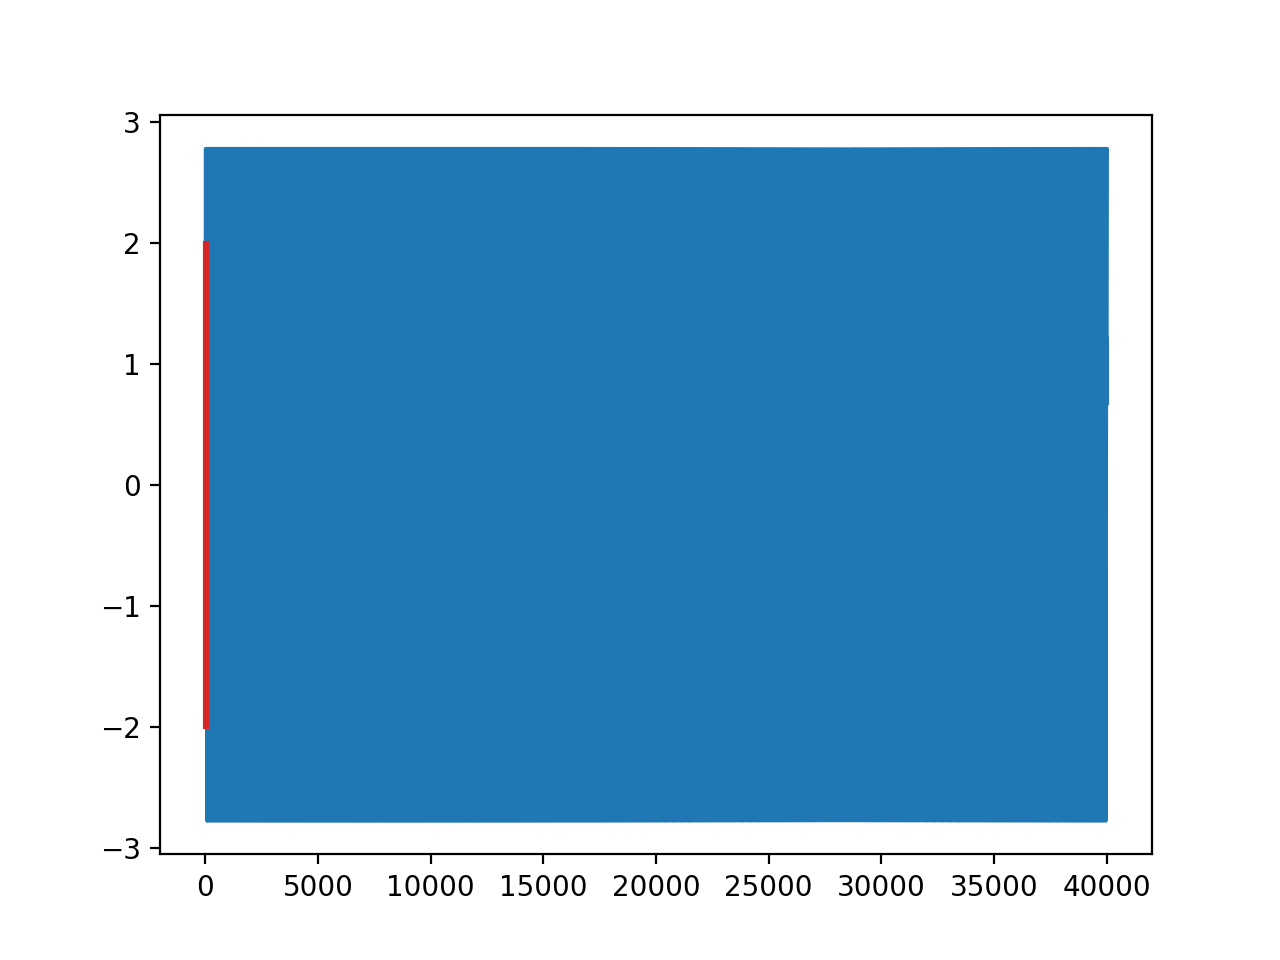

<IPython.core.display.Javascript object>


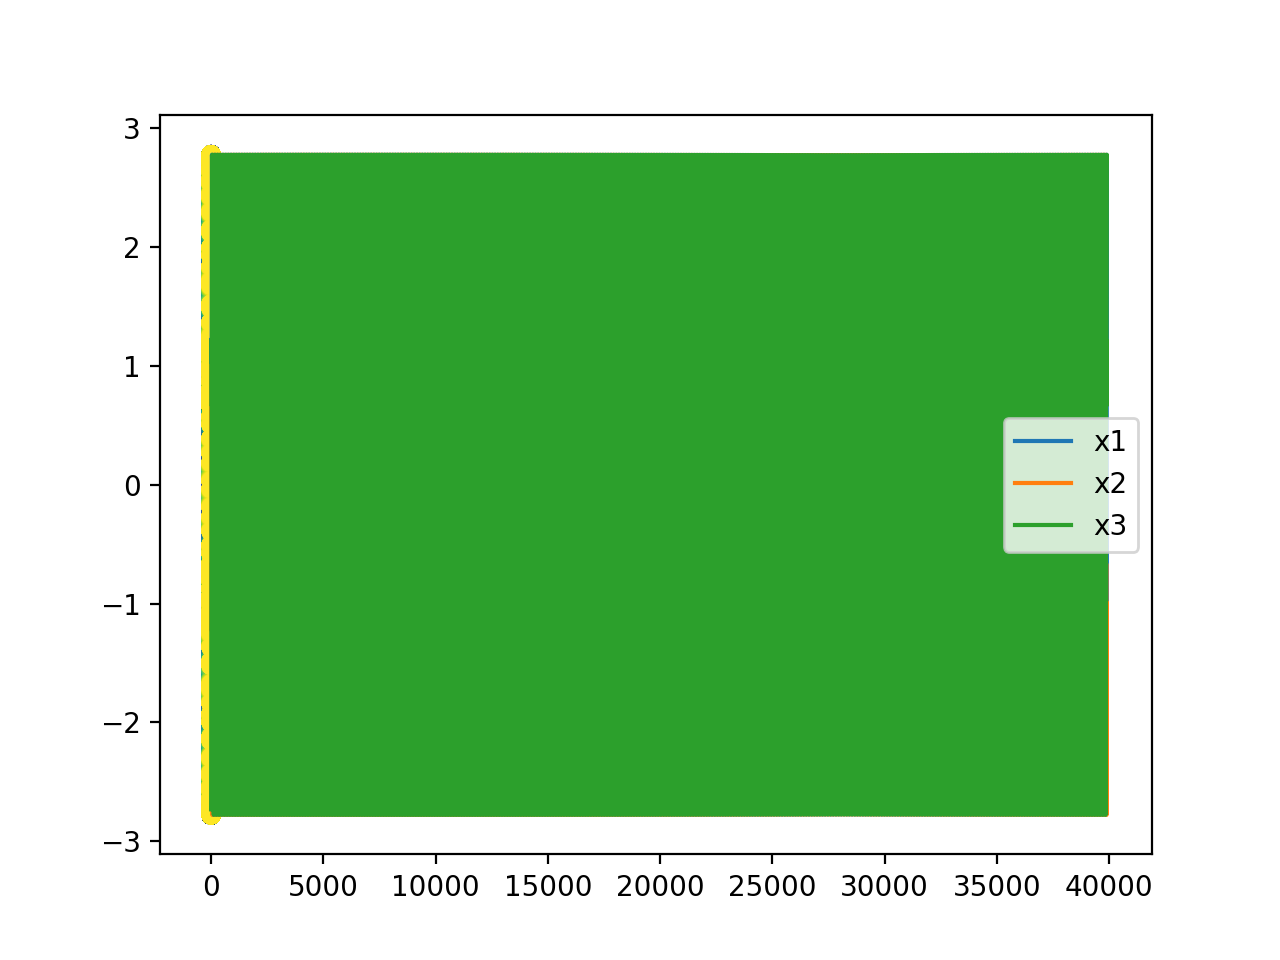

<IPython.core.display.Javascript object>


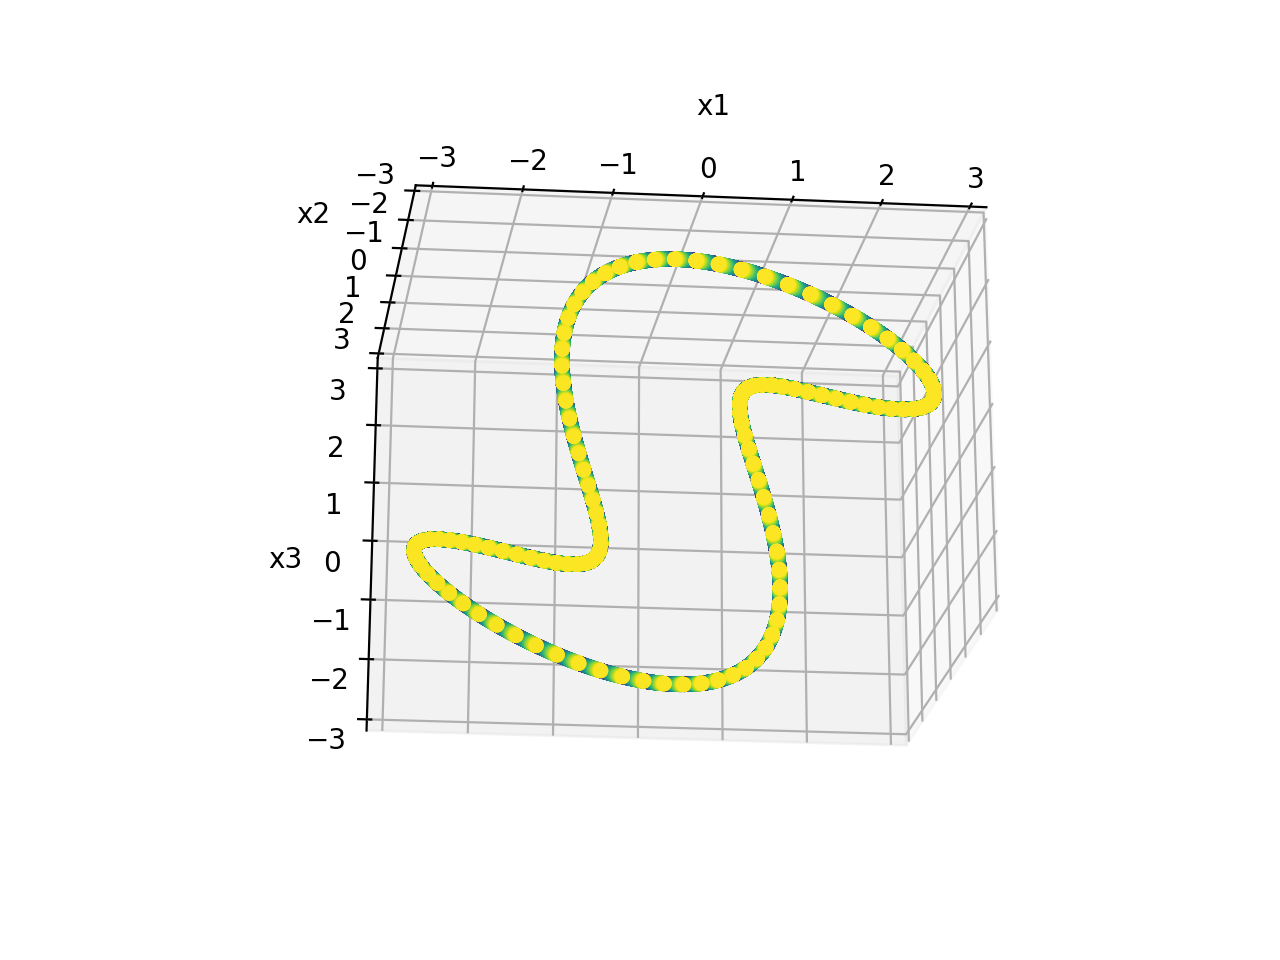

<IPython.core.display.Javascript object>


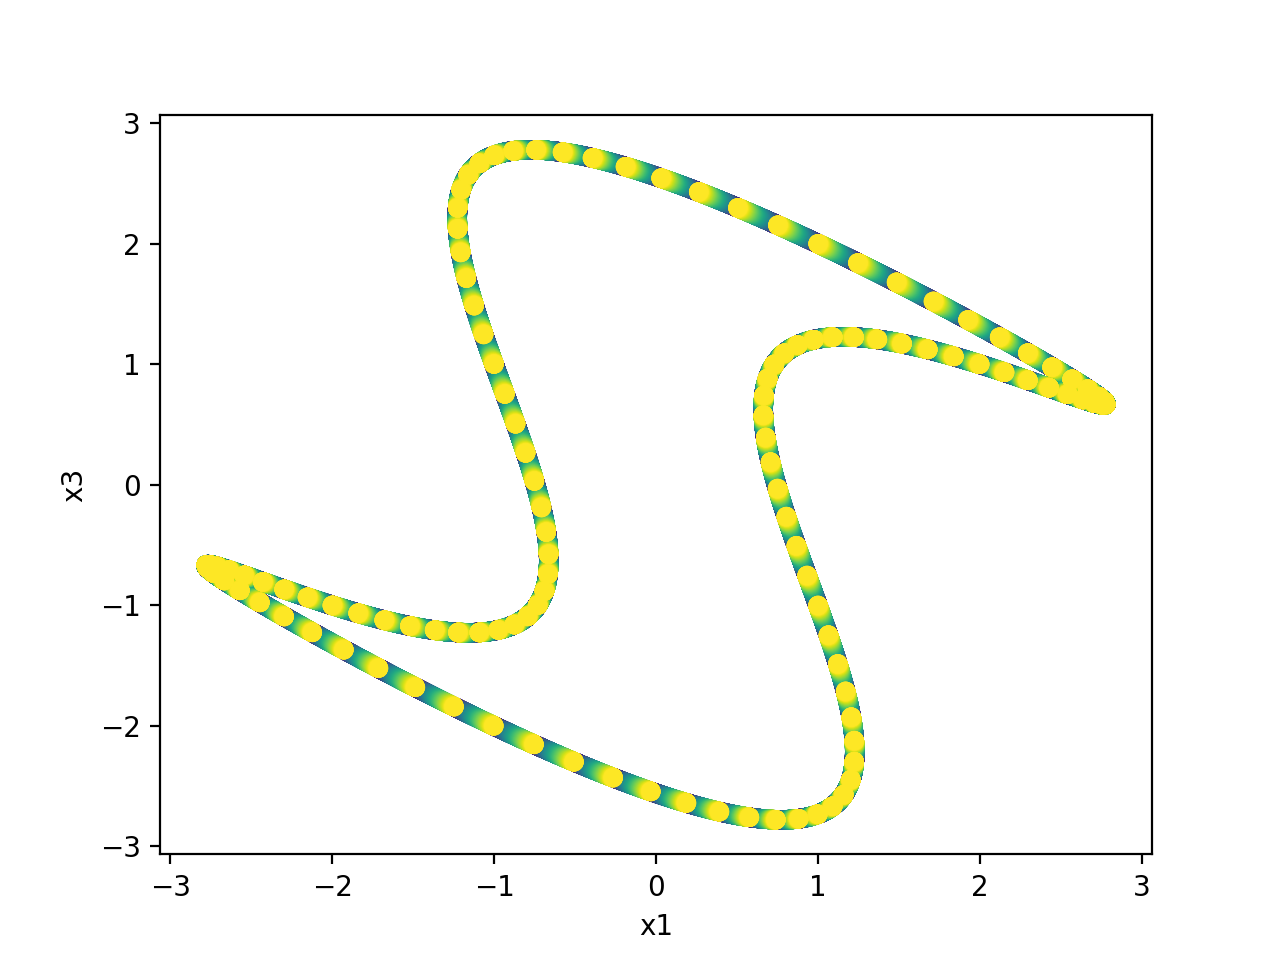

Text(0, 0.5, 'x3')

In [22]:
plt.figure()
plt.plot(x)
plt.plot([0, 0], [-2, 2], c='C3')
plt.plot([Tau/2, Tau/2], [-1.5, 1.5], c='C3')
plt.plot([Tau, Tau], [-2, 2], c='C3')


x1 = x[0:-Tau]
x2 = x[int(Tau/2):-int(Tau/2)]
x3 = x[Tau::]


plt.figure()
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)
plt.legend(["x1", "x2", "x3"])

plt.scatter(x1, x2, c=t[0:len(x1)])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=t[0:len(x1)])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")

plt.figure()
plt.scatter(x1, x3, c=t[0:len(x1)])
plt.xlabel("x1")
plt.ylabel("x3")